# Part II - Prosper Loan Data Exploration
## by Elie Kibwe Mwalindomba

## Investigation Overview


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, and many others. We worked on about 20 most interresting variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans_df = pd.read_csv('prosperLoanData.csv')

In [3]:
to_keep =['ListingKey','CreditGrade','LoanNumber','Term','LoanStatus','BorrowerRate','ProsperScore','ListingCategory (numeric)',
'EmploymentStatus','IsBorrowerHomeowner','IncomeRange','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationDate',
'LoanOriginationQuarter','MonthlyLoanPayment','OpenRevolvingAccounts','CurrentDelinquencies',
'AmountDelinquent','DebtToIncomeRatio','TotalProsperLoans','LoanCurrentDaysDelinquent','Investors']
all_col = list(loans_df)

In [4]:
## Let's delete the others
to_delete = []
for col in all_col:
    if col not in to_keep:
        to_delete.append(col)
        
loans_df.drop(columns=to_delete, inplace=True)

## Let's reorder this dataset
loans_df = loans_df[to_keep]

In [5]:
# let's convert ListingCategory into ordered categorical types
loans_df['ListingCategory (numeric)'] = loans_df['ListingCategory (numeric)'].astype("category")

In [6]:
#Creating a dictionary of alpha correspondance .
ListingCategoryMap = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                            5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
                            11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
                            15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

loans_df['ListingCategoryAlpha'] = loans_df['ListingCategory (numeric)'].map(ListingCategoryMap)

## Distribution of LOAN ORIGINAL AMOUNT

> The origination amount of the loan in our data set determine the range of differents loans.
On a logarithmic scale we can see from the outset that the loan amounts are highly concentrated at 4,000, 10,000 and 15,000.

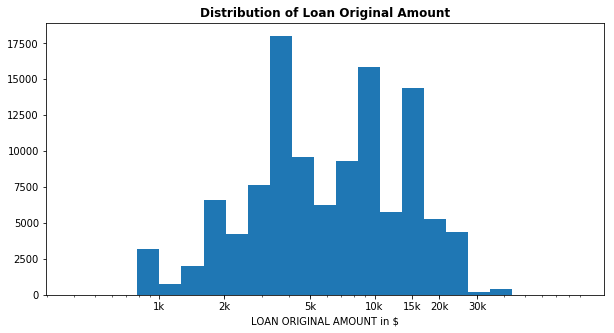

In [7]:
loan_mean = loans_df.LoanOriginalAmount.mean()
log_binsize = 0.095
bins = 12 ** np.arange(2.4, np.log10(loans_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data =loans_df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Original Amount',fontweight='bold')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 1.5e4, 2e4, 3e4], ['1k', '2k', '5k', '10k', '15k', '20k', '30k'])
plt.xlabel('LOAN ORIGINAL AMOUNT in $')
plt.show()

## Borrower Interesr rate vs. Loan original amount

> We see through this analysis that the outcome of a loan is affected by the amount borrowed and the interest rate of the loan. As the borrower's credit score increases, the interest rate decreases.
As shown in this plot

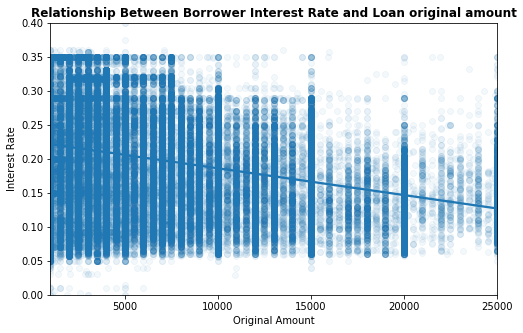

In [8]:
plt.figure(figsize=[8, 5])
sb.regplot(data=loans_df, x='LoanOriginalAmount', y="BorrowerRate", truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlim(1000, 25000);
plt.ylim(0, .4);
plt.xlabel('Original Amount');
plt.ylabel('Interest Rate');
plt.title('Relationship Between Borrower Interest Rate and Loan original amount', fontweight='bold');

## Loan Outcome by Loan amounts and Interest rates according to Employments Status

> Let's look in detail at how the loan amount and interest rate affect the final outcome of the loan.
Here, cancelled loans tend to have lower amounts and lower interest rates. Certainly because they don't have much impact on the investor. We can also see that delinquent loans tend to have a greater difference in loan amount and loan interest rate.

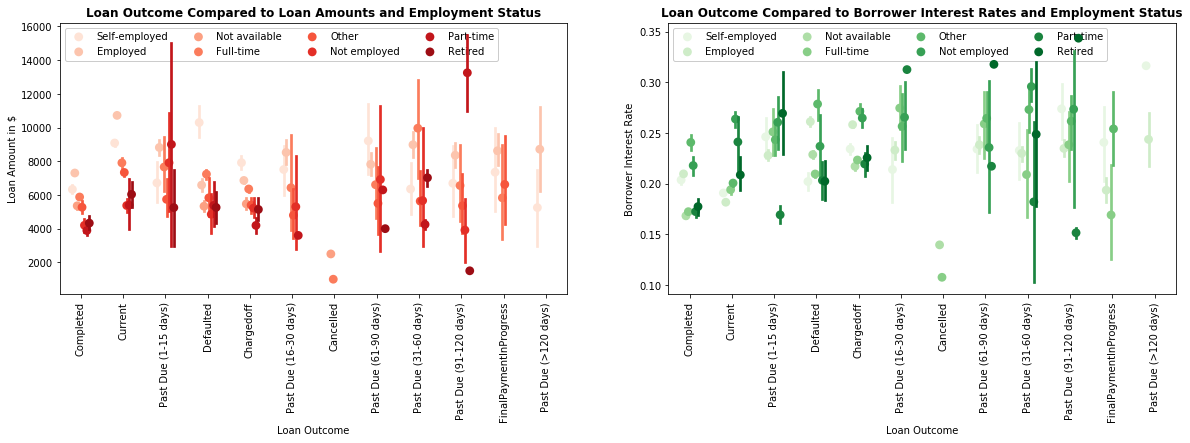

In [9]:
# relationship of LoanStatus against LoanAmount and BorrowerRate
fig, ax = plt.subplots(ncols=2, figsize = [20,5])
sb.pointplot(data = loans_df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
ax[0].set_title('Loan Outcome Compared to Loan Amounts and Employment Status', fontweight='bold')
ax[0].set_ylabel('Loan Amount in $')
ax[0].set_xlabel('Loan Outcome')
ax[0].legend(loc=2, ncol=4, framealpha=1);
ax[0].tick_params('x', rotation=90);
sb.pointplot(data = loans_df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1])
ax[1].set_title('Loan Outcome Compared to Borrower Interest Rates and Employment Status', fontweight='bold')
ax[1].set_ylabel('Borrower Interest Rate')
ax[1].set_xlabel('Loan Outcome')
ax[1].legend(loc=2, ncol=4, framealpha=1);
ax[1].tick_params('x', rotation=90);

## Borrower interest rates vs. Income range

> The income categories "Not employed" or "1-24,999" show a relationship with a higher borrower interest rate, which was expected. Similarly, the unemployed also show a higher interest rate. 

In [10]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

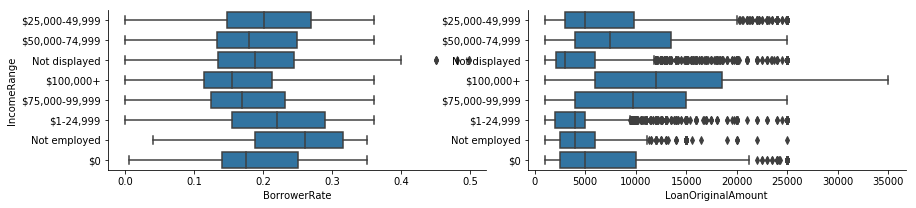

In [11]:
plt.figure(figsize = [25, 25]);
g = sb.PairGrid(data = loans_df, y_vars = 'IncomeRange' , 
                x_vars = ['BorrowerRate', 'LoanOriginalAmount'], size = 3, aspect = 2);
g.map(boxgrid);


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt